In [2]:
include("../AR/utils/utils.jl")
include("../AR/utils/Structure.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"

"../mystations/"

TN temperatures and dates

In [3]:
TN_temp_Montpellier = initTN(commonpath * "TN_Montpellier.txt")
TN_temp_Bonn = initTN(commonpath * "TN_Bonn.txt")
TN_temp_Nantes = initTN(commonpath * "TN_Nantes.txt")

TN_vecs = [TN_temp_Montpellier.df.TN, TN_temp_Bonn.df.TN, TN_temp_Nantes.df.TN]
dates_vecs_TN = [TN_temp_Montpellier.df.DATE, TN_temp_Bonn.df.DATE, TN_temp_Nantes.df.DATE]

3-element Vector{Vector{Date}}:
 [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2022-12-22"), Date("2022-12-23"), Date("2022-12-24"), Date("2022-12-25"), Date("2022-12-26"), Date("2022-12-27"), Date("2022-12-28"), Date("2022-12-29"), Date("2022-12-30"), Date("2022-12-31")]
 [Date("1976-11-01"), Date("1976-11-02"), Date("1976-11-03"), Date("1976-11-04"), Date("1976-11-05"), Date("1976-11-06"), Date("1976-11-07"), Date("1976-11-08"), Date("1976-11-09"), Date("1976-11-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")]
 [Date("1992-01-01"), Date("1992-01-02"), Date("1992-01-03"), Date("1992-01-04"), Date("1992-01-05"), Date("1992-01-06"), Date("1992-01-07"), Date("1992-01-08

## Apple phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budburst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

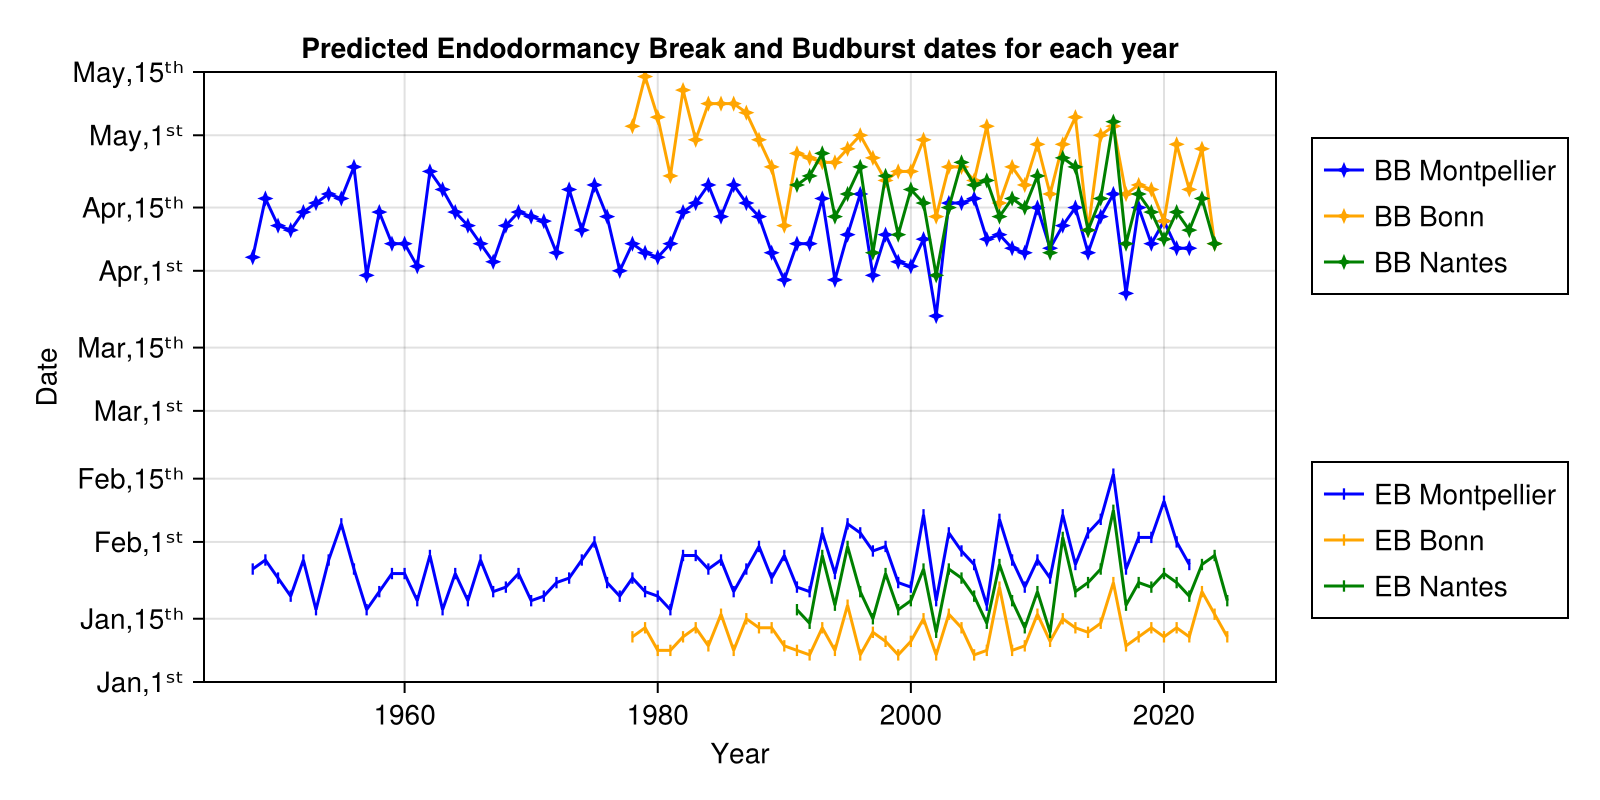

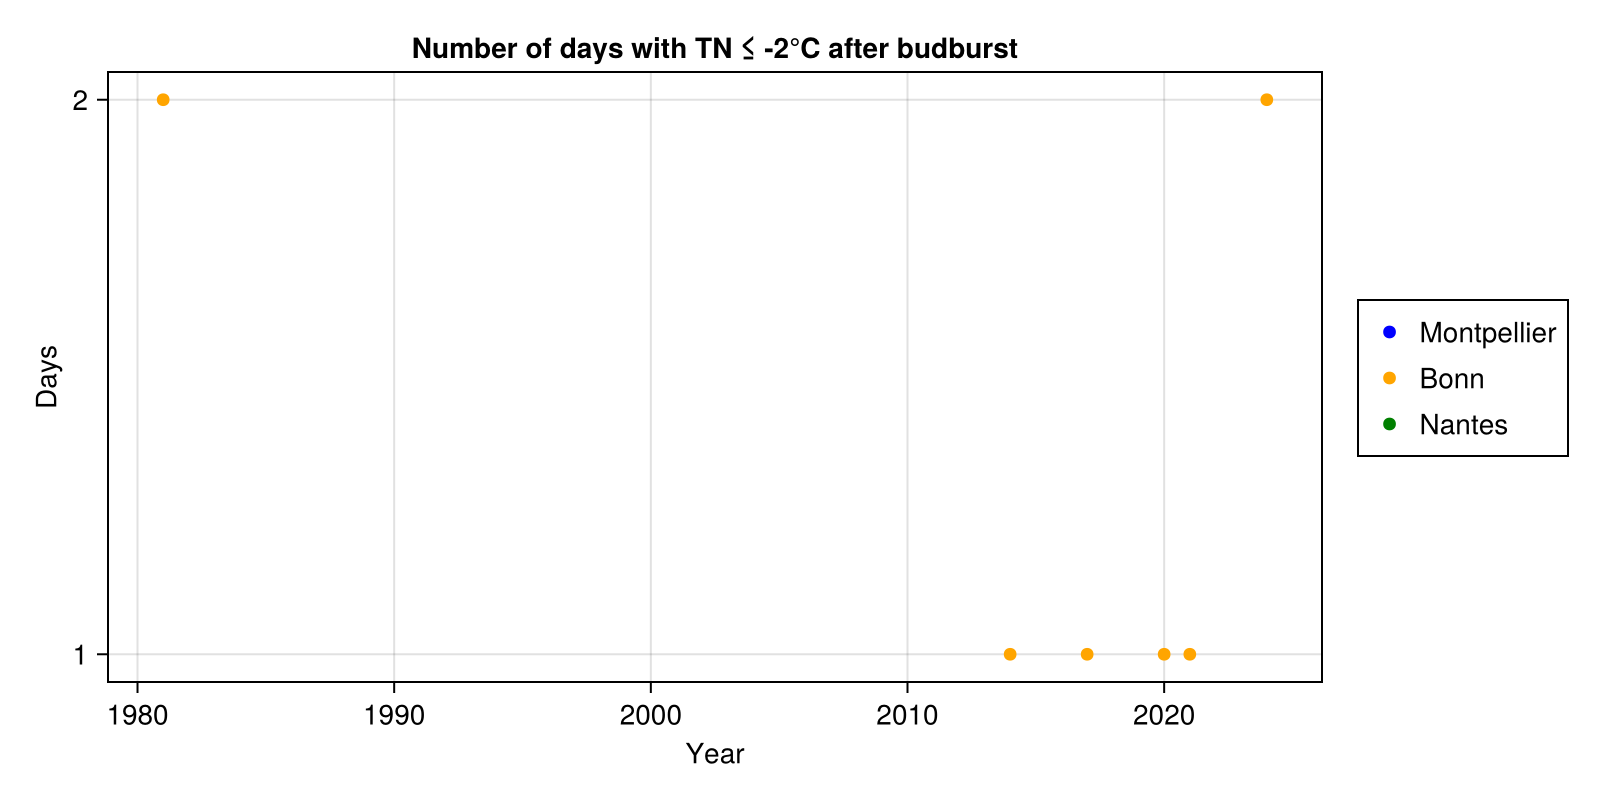

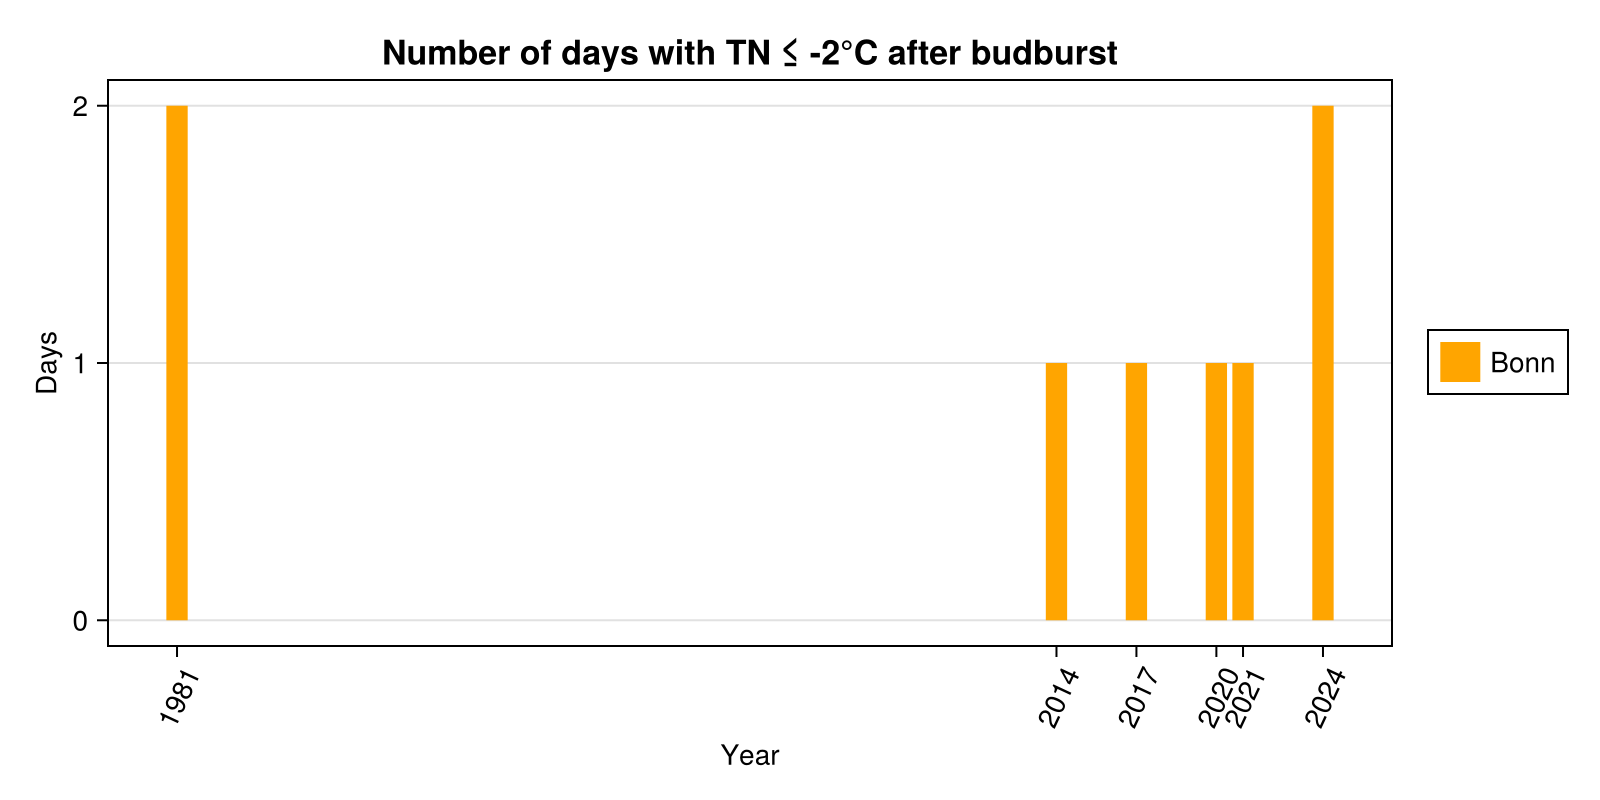

[2, 1, 1, 1, 1, 2]


CairoMakie.Screen{PDF}


In [4]:
DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(initTG(commonpath * "TG_Montpellier.txt"))
DB_Bonn, BB_Bonn = Apple_Phenology_Pred(initTG(commonpath * "TG_Bonn.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG(commonpath * "TG_Nantes.txt"))
# DB_Forli, BB_Forli = Apple_Phenology_Pred(initTG(commonpath * "TG_Forli.txt"))

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue", "orange", "green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,
    (10, 30),
    DB_label=["EB Montpellier", "EB Bonn", "EB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "DB Forli"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Apple_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label)

display(fig)

include("PhenoPlot.jl")
fig = Plot_Freeze_Risk_Bar(TN_temp_Bonn, BB_Bonn,
    color="orange",
    label="Bonn")

display(fig)
save("Presentation/Freeze_Risk.pdf", fig, ; px_per_unit=2.0)

## Vine phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

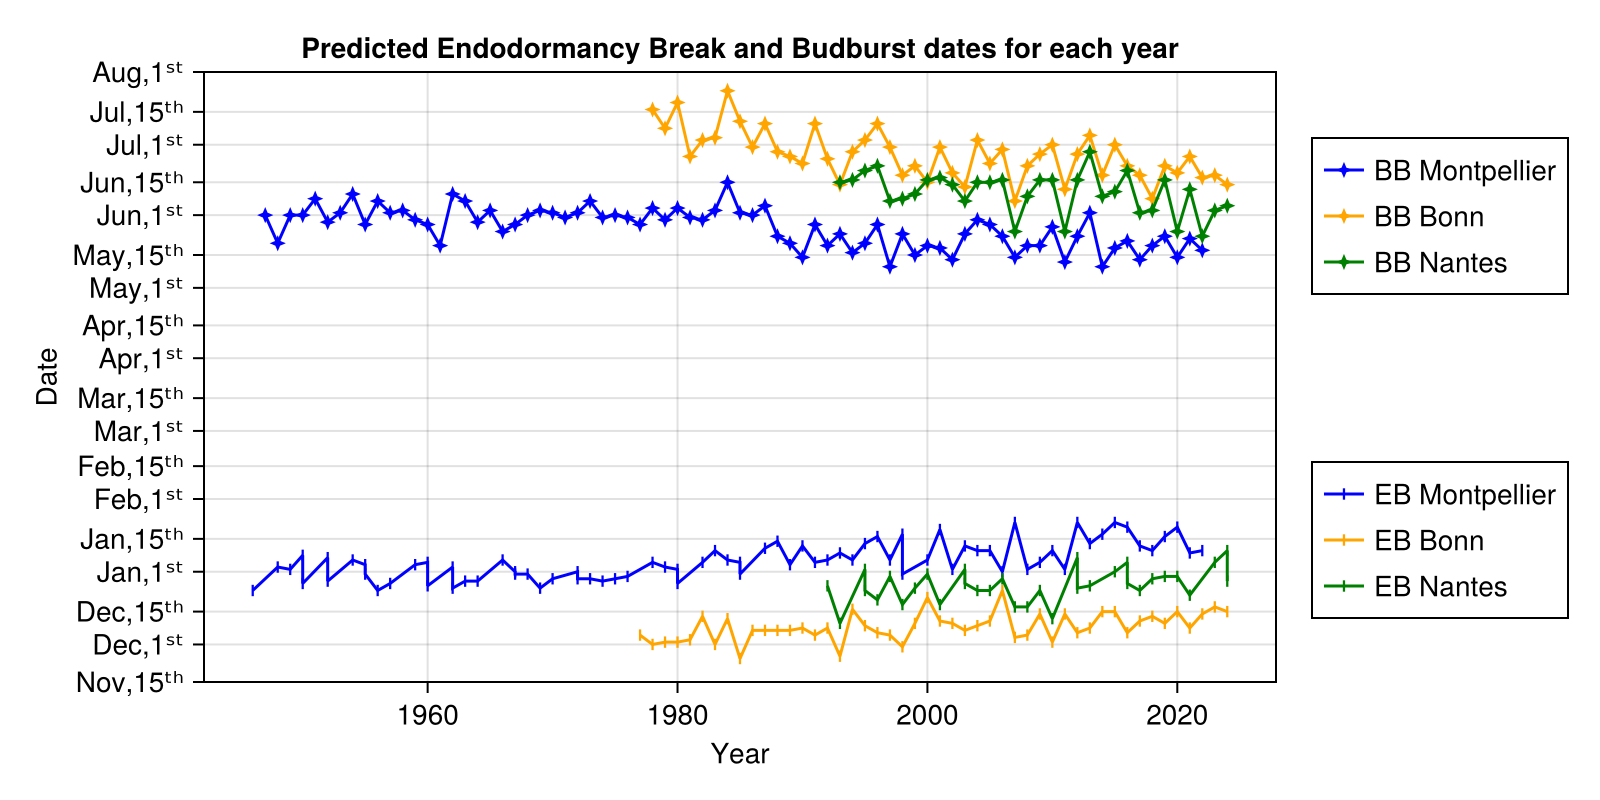

UndefVarError: UndefVarError: `TN_vecs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
DB_Montpellier, BB_Montpellier = Vine_Phenology_Pred(commonpath * "TN_Montpellier.txt", commonpath * "TX_Montpellier.txt")
DB_Bonn, BB_Bonn = Vine_Phenology_Pred(commonpath * "TN_Bonn.txt", commonpath * "TX_Bonn.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred(commonpath * "TN_Nantes.txt", commonpath * "TX_Nantes.txt")
# DB_Forli, BB_Forli = Vine_Phenology_Pred(commonpath * "TN_Forli.txt", commonpath * "TX_Forli.txt")

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue", "orange", "green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,# BB_Forli],
    (8, 1),
    DB_label=["EB Montpellier", "EB Bonn", "EB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "BB Forli"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Gvine_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]
label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label,
    threshold=-0.5)

display(fig)